In [1]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

from deep.neural import VAE


## Data Loaders

In [2]:
BATCH_SIZE = 128
SHUFFLE = True
NUM_WORKERS = 12

In [3]:
train_set_loader = data.DataLoader(
    datasets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True),
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    num_workers=NUM_WORKERS,
)

test_set_loader = data.DataLoader(
    datasets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True),
    batch_size=BATCH_SIZE,
    shuffle=SHUFFLE,
    num_workers=NUM_WORKERS,
)

## Net and Optimizer

In [4]:
net = VAE(beta=5)
optimizer = optim.Adam(net.parameters(), lr=1e-4)

In [5]:
try:
    net.load_state_dict(torch.load(open('state_dict.pth', 'rb')))
    print('State Dict loaded from \'state_dict.pth\'')
except:
    pass

State Dict loaded from 'state_dict.pth'


## Train Loop

In [6]:
def train(epochs=10):
    print('='*10, end='')
    print(' TRAIN', end=' ') 
    print('='*10, end='\n\n')
    net.train()

    for epoch in range(1, epochs+1):
        running_loss = 0

        for i, batch in enumerate(train_set_loader, 1):
            images, _ = batch
            images = images.view(-1, 28*28)
            
            # Zero grad
            optimizer.zero_grad()

            # Forward
            mu, sigma, z, reconstructions = net(images)
            # Compute Loss
            loss_value = net.loss_function(reconstructions, images, mu, sigma)
            running_loss += loss_value.item()
            # Backward
            loss_value.backward()
            # Update
            optimizer.step()

            if i % 100 == 0:
                print(f'==> EPOCH[{epoch}]({i}/{len(train_set_loader)}): LOSS: {loss_value.item()}')

        print(f'=====> EPOCH[{epoch}] Completed: Avg. LOSS: {running_loss/len(train_set_loader)}')
        print()


In [7]:
train(10)

========== TRAIN ==========

==> EPOCH[1](100/469): LOSS: 19632.626953125
==> EPOCH[1](200/469): LOSS: 20396.14453125
==> EPOCH[1](300/469): LOSS: 19560.185546875
==> EPOCH[1](400/469): LOSS: 19330.31640625
=====> EPOCH[1] Completed: Avg. LOSS: 20036.619098980544

==> EPOCH[2](100/469): LOSS: 20235.37890625
==> EPOCH[2](200/469): LOSS: 20245.392578125
==> EPOCH[2](300/469): LOSS: 20275.025390625
==> EPOCH[2](400/469): LOSS: 20059.2890625
=====> EPOCH[2] Completed: Avg. LOSS: 20027.258349713487

==> EPOCH[3](100/469): LOSS: 19389.001953125
==> EPOCH[3](200/469): LOSS: 19322.01171875
==> EPOCH[3](300/469): LOSS: 20021.49609375
==> EPOCH[3](400/469): LOSS: 20295.59765625
=====> EPOCH[3] Completed: Avg. LOSS: 20013.115126099412

==> EPOCH[4](100/469): LOSS: 19022.94921875
==> EPOCH[4](200/469): LOSS: 20276.5234375
==> EPOCH[4](300/469): LOSS: 19801.923828125
==> EPOCH[4](400/469): LOSS: 19771.9453125
=====> EPOCH[4] Completed: Avg. LOSS: 20006.082322761195

==> EPOCH[5](100/469): LOSS: 203

0


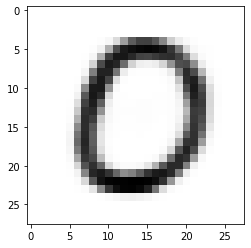

In [287]:
image, label = test_set_loader.dataset[10]
image = image.view(-1, 28*28).unsqueeze(0)

mu, sigma = net.encode(image)
z_1 = mu + sigma * torch.rand_like(sigma)

recon = net.decode(z_1)
print(label)
plt.imshow(recon.view(28, 28).detach().numpy(), cmap='Greys');

9


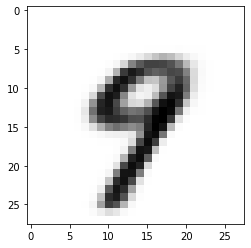

In [288]:
image, label = test_set_loader.dataset[20]
image = image.view(-1, 28*28).unsqueeze(0)

mu, sigma = net.encode(image)
z_2 = mu + sigma * torch.rand_like(sigma)

recon = net.decode(z_2)
print(label)
plt.imshow(recon.view(28, 28).detach().numpy(), cmap='Greys');

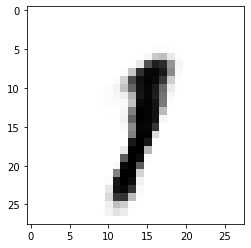

In [289]:
z_3 = z_2 - z_1
recon = net.decode(z_3)
plt.imshow(recon.view(28, 28).detach().numpy(), cmap='Greys');

In [63]:
torch.save(net.state_dict(), open('state_dict.pth', 'wb'))